In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dynamics Model

In [2]:
def dubins_step(x, u, dt):
    """Run one step of dynamics

    Parameters
    ----------
    x : np.array
        State vector (x, y, theta)
    u : np.array
        Control vector (v, w)
    dt : float
        Time step

    Returns
    -------
    np.array
        Updated state vector (x, y, theta)

    """
    x_dot = u[0] * np.cos(x[2])
    y_dot = u[0] * np.sin(x[2])
    theta_dot = u[1]
    x_new = x + np.array([x_dot, y_dot, theta_dot]) * dt
    return x_new

In [3]:
def dubins_traj(x0, U, dt):
    """Compute dubins trajectory from a sequence of controls
    
    Parameters
    ----------
    x0 : np.array
        Initial state vector (x, y, theta)
    U : np.array
        Control sequence (v, w)
    dt : float
        Time step
    
    Returns
    -------
    np.array
        Trajectory (x, y, theta)
    
    """
    traj = np.zeros((len(U), 3))
    traj[0] = x0
    for i in range(1, len(U)):
        traj[i] = dubins_step(traj[i-1], U[i-1], dt)
    return traj

In [4]:
DT = 0.1
N = 30
V_MAX = 1  # [m/s]
W_MAX = 1  # [rad/s]
V_BOUNDS = np.array([-V_MAX, V_MAX])
W_BOUNDS = np.array([-W_MAX, W_MAX])

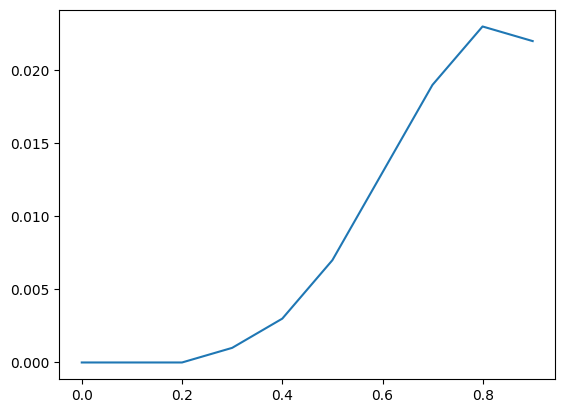

In [5]:
# Test dubins trajectory
x0 = np.array([0, 0, 0])
U = np.array([[1, 0], [1, 0.1], [1, 0.1], [1, 0.2], [1, 0.2], [1, 0], [1, -0.2], [1, -0.5], [1, 0], [1, 0]])
dt = 0.1
traj = dubins_traj(x0, U, dt)
# Plot trajectory
plt.plot(traj[:, 0], traj[:, 1])
plt.show()

# All System ID Trajectories

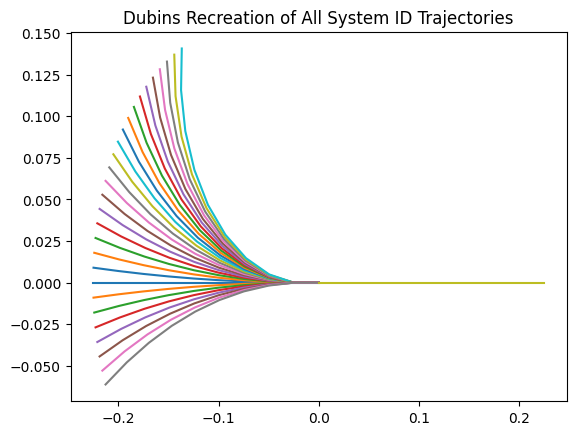

In [6]:
# create u & v values that match system_id files
x0_dubins = np.array([0, 0, 0])
v_dubins = np.append(-0.25*np.ones(28), [0.25])
w_dubins = [round(-0.1 - 0.1*n, 1) for n in range(0,20)]
w2_dubins = [round(0.1*n, 1) for n in range(0,8)]
w_dubins = np.append(w_dubins, w2_dubins)
w_dubins = np.append(w_dubins, [0])

fig,ax=plt.subplots()
for i in range(len(v_dubins)):
    vi_d = v_dubins[i]
    wi_d = w_dubins[i]
    U_dubins = np.array([[vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d], [vi_d, wi_d]])
    dt = 0.1
    traj_dubins = dubins_traj(x0_dubins, U_dubins, dt)
    # Plot trajectory
    ax.plot(traj_dubins[:, 0], traj_dubins[:, 1])
    plt.title("Dubins Recreation of All System ID Trajectories")

# Comparisons to System ID

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt

from multirtd.dubins_model import dubins_traj

In [8]:
data_path = os.path.join(os.getcwd(), '..', 'data', 'turtlebot_system_id', '1-16-2023')
data_files = os.listdir(data_path)

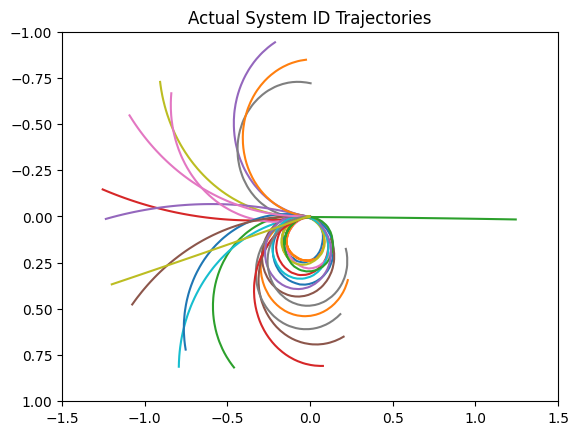

In [9]:
for file in data_files:
    
    data = np.load(os.path.join(data_path, file))
    
    file_split = file.split('_')
    v_id, w_id = [float(file_split[i]) for i in [1, 3]]
    T = float(file_split[4][0])
    
    plt.plot(data[:,0], data[:,1])
    plt.title("Actual System ID Trajectories")
    plt.xlim((-1.5,1.5))
    plt.ylim((1,-1))
    

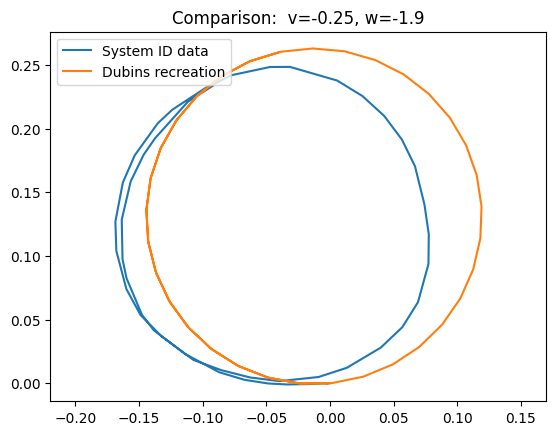

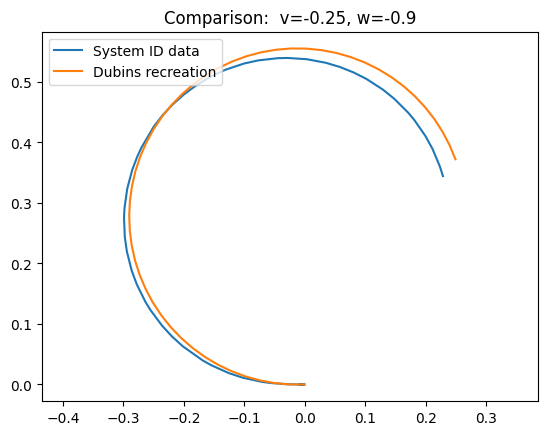

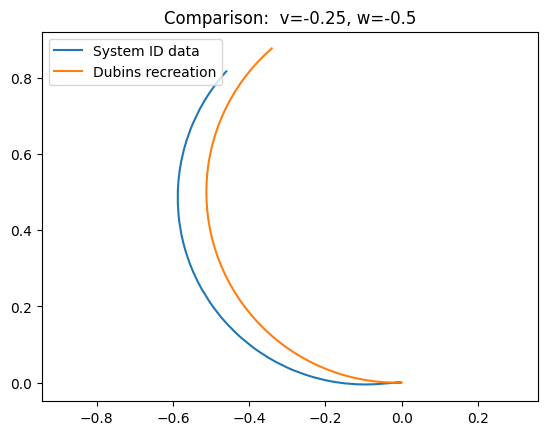

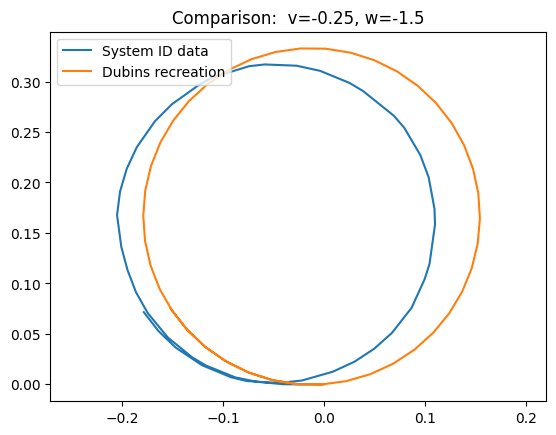

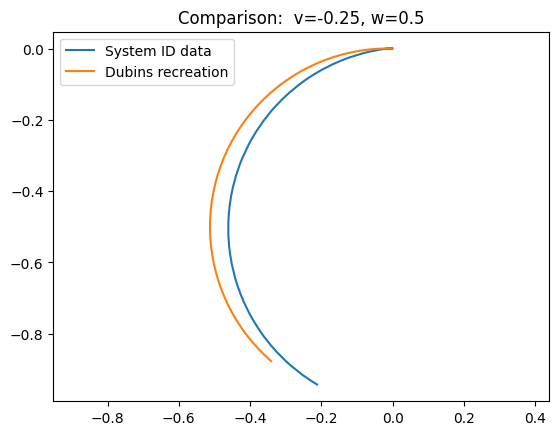

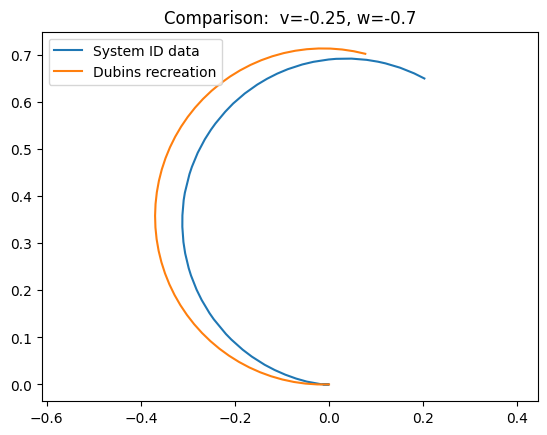

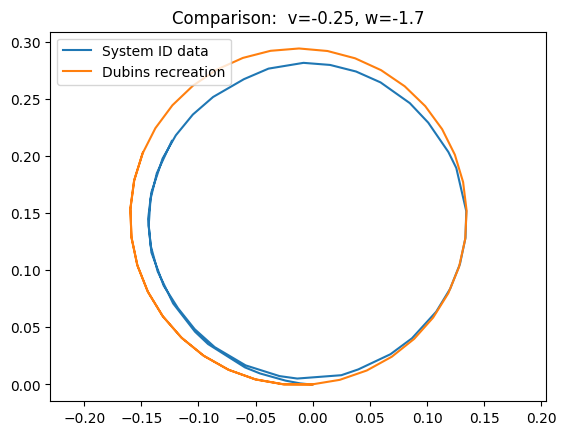

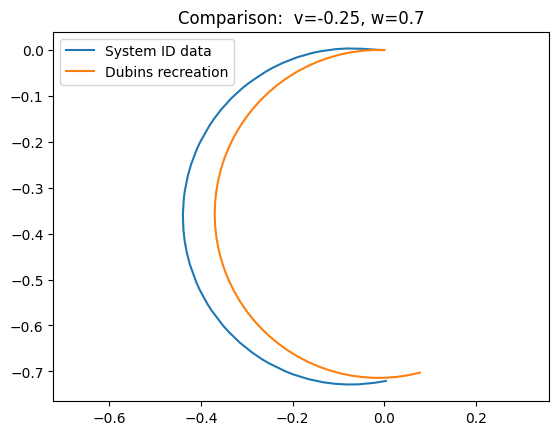

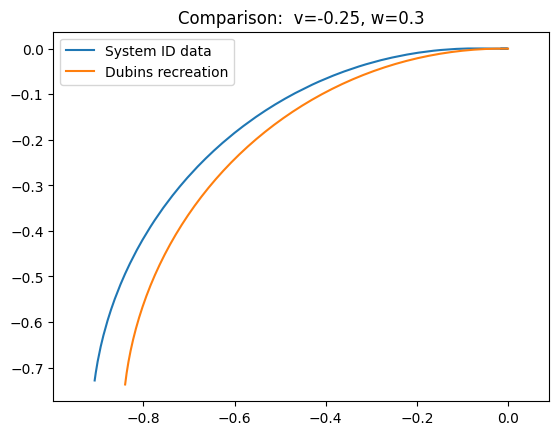

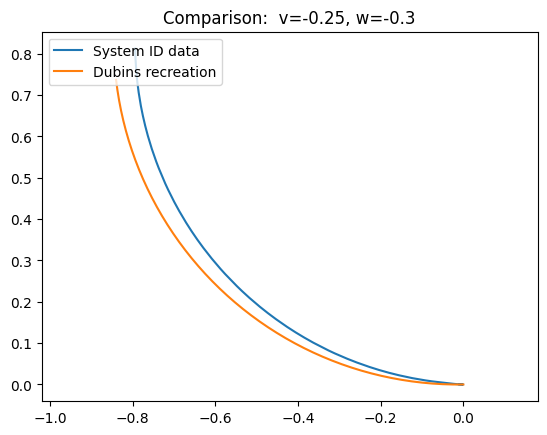

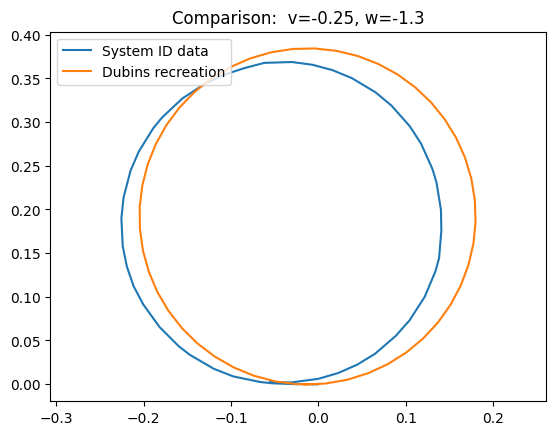

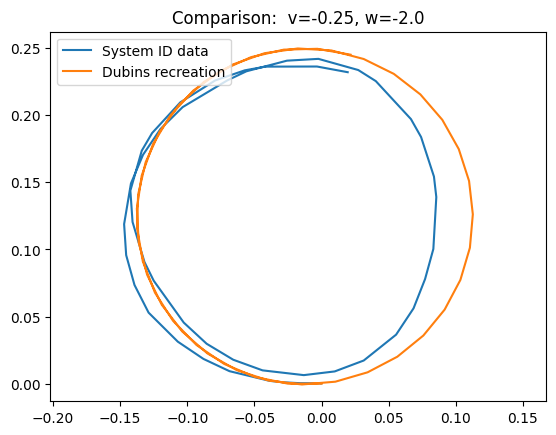

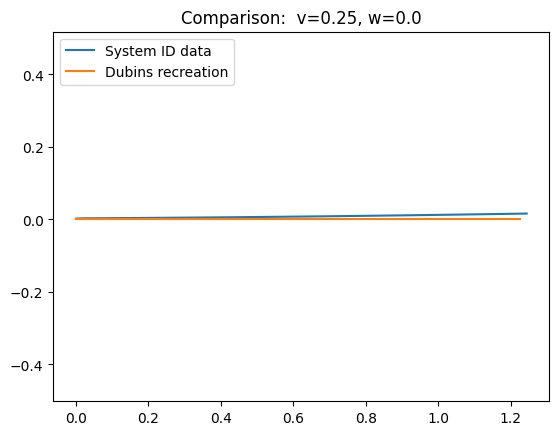

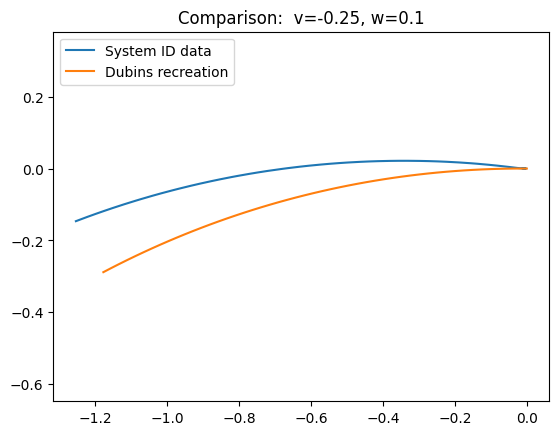

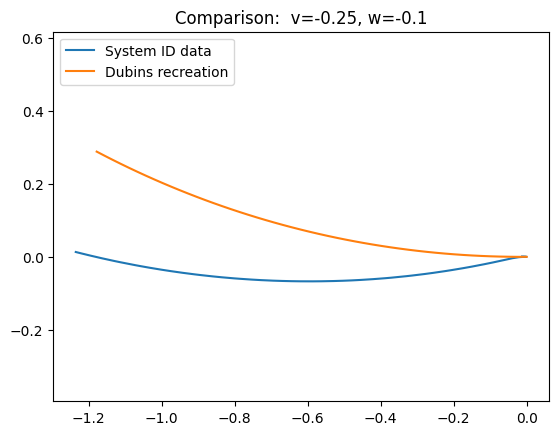

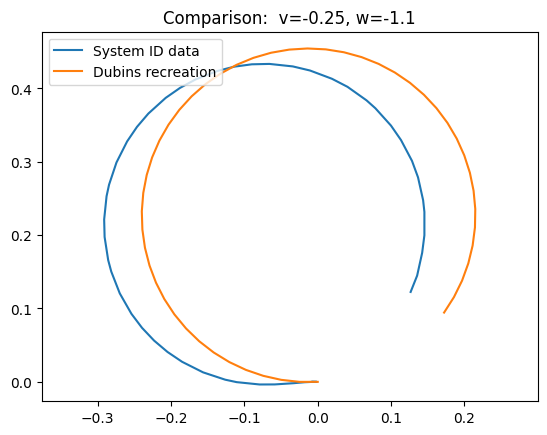

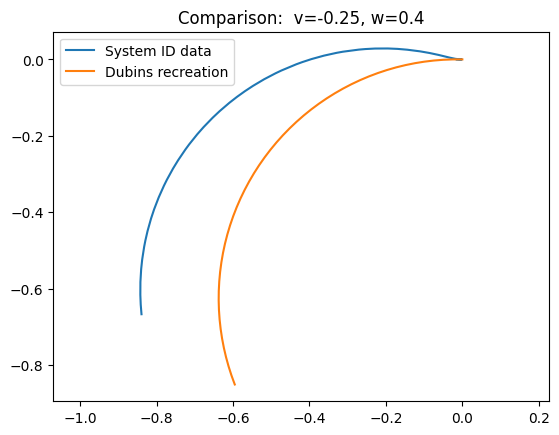

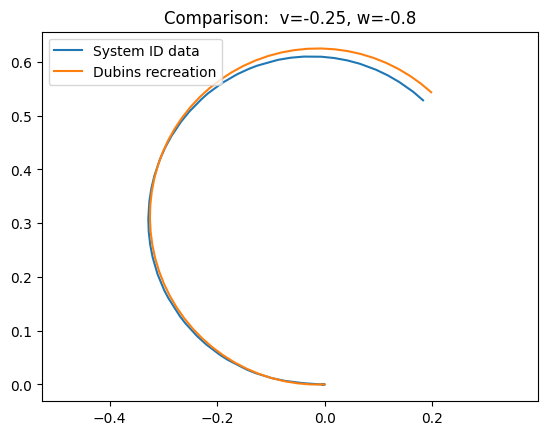

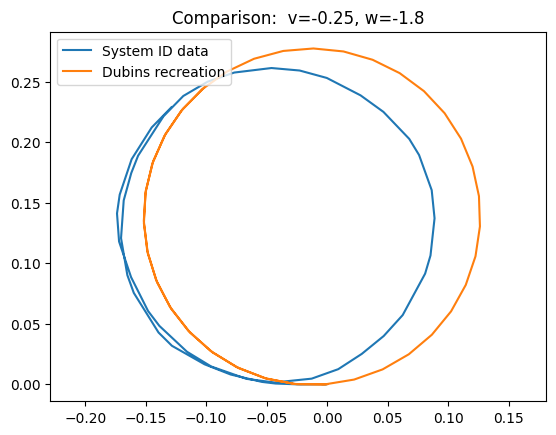

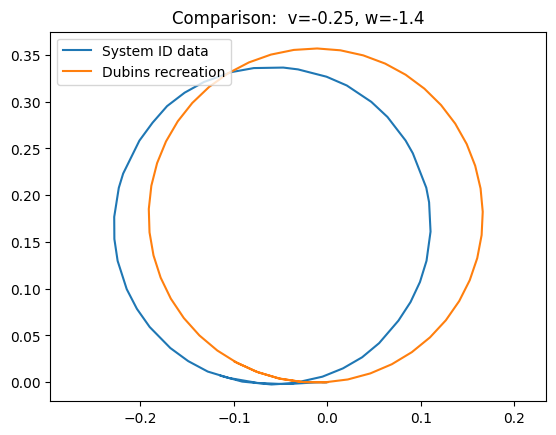

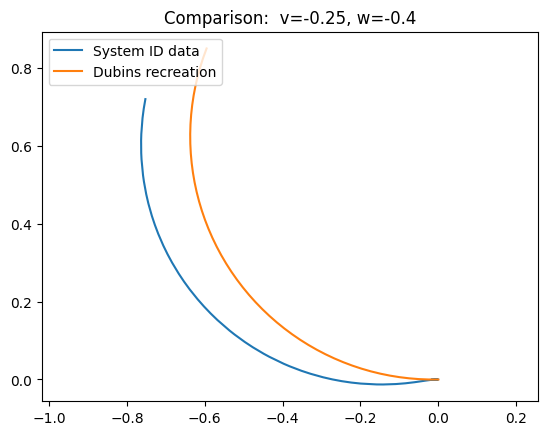

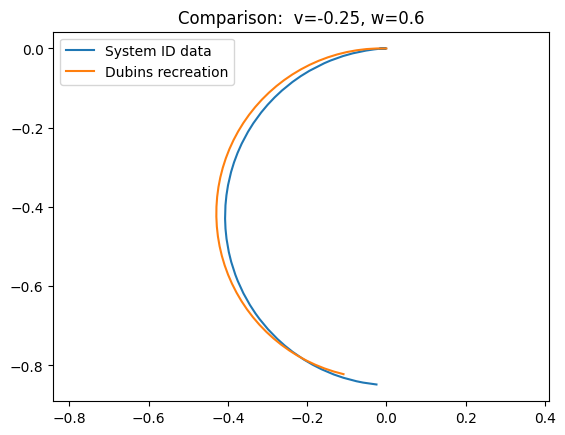

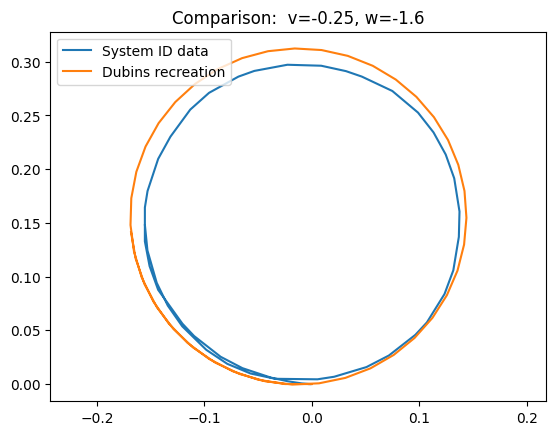

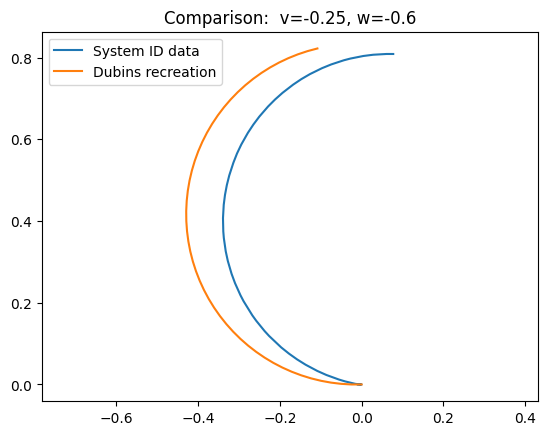

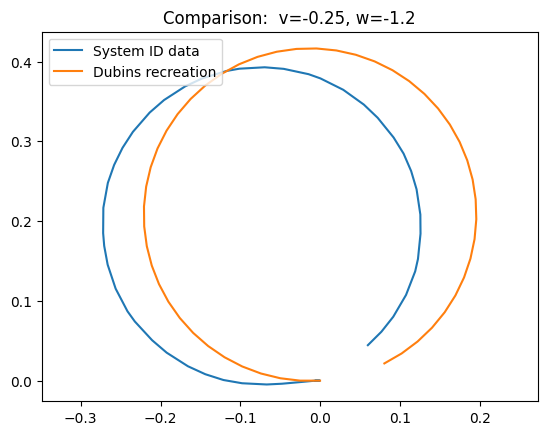

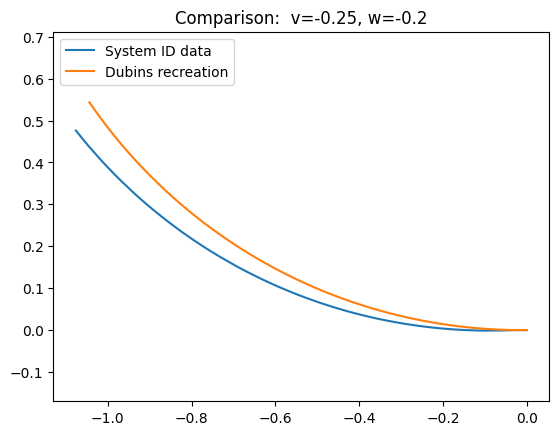

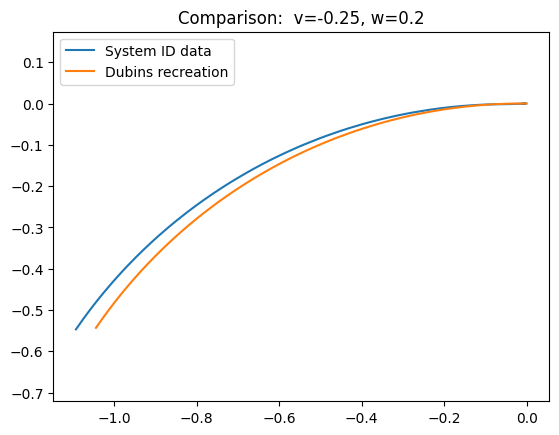

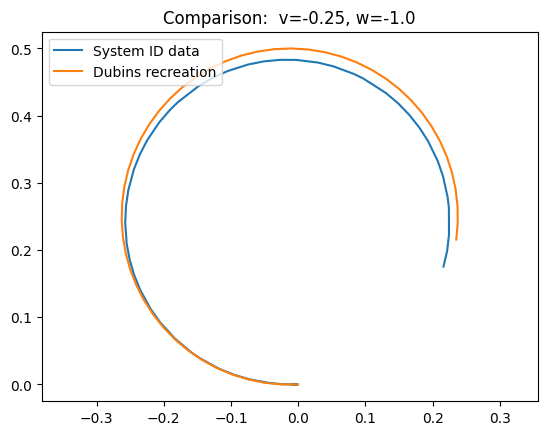

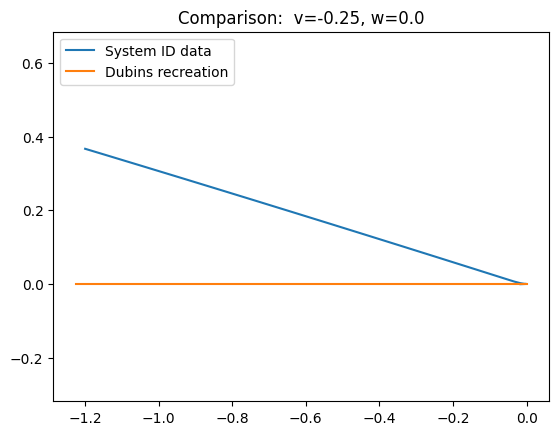

In [10]:
for file in data_files:
    
    # Load in System ID data
    data = np.load(os.path.join(data_path, file))
    file_split = file.split('_')
    v_id, w_id = [float(file_split[i]) for i in [1, 3]]
    T = float(file_split[4][0])
    dt = 0.1
    
    # Create matching Dubins data
    x0_dub = np.array([0, 0, 0])
    v_dub = np.repeat(v_id, T/dt)
    w_dub = np.repeat(w_id, T/dt)
    U = np.vstack((v_dub, w_dub)).T
    traj_dub = dubins_traj(x0_dub, U, dt)
    
    # Plot System ID data
    plt.plot(data[:,0], data[:,1], label="System ID data")
    plt.plot(traj_dub[:, 0], traj_dub[:, 1], label="Dubins recreation")
    plt.title("Comparison:  v=" + str(v_id) + ", w=" + str(w_id))
    plt.legend(loc="upper left")
    plt.axis('equal')
    plt.show()